In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/elasComputacao/raio-x-dados/main/data/dados-brutos/historico_alunos_raiox.csv')

In [6]:
optativas_previstas = """PRATICA DE ENSINO DE COMPUTACAO I
ADM.DE SIST.GERENC.DE BANCO DE DADOS
ADMINISTRACAO DE SISTEMAS
ALGORITMOS AVANCADOS I
ALGORITMOS AVANCADOS II
ALGORITMOS AVANCADOS III
ALGORITMOS AVANCADOS IV
ARQUITETURA DE SOFTWARE
AVAL.DE DESEMPENHO DE SISTEMAS DISCRETOS
BANCO DE DADOS II
COMPUTAÇÃO E MÚSICA
COMPUTAÇÃO GRÁFICA
DES DE SOFTWARE INTEG A OPER DA INFRAEST
DESENV. DE APLICACOES CORP. AVANCADAS
ECONOMIA DE TECNOLOGIA DA INFORMACAO
EMPREENDEDORISMO EM SOFTWARE
GERENCIA DE REDES
INTERCONEXAO DE REDES DE COMPUTADORES
INTERFACE HOMEM-MÁQUINA
MÉTODOS E SOFTWARE NUMÉRICOS
METODOS FORMAIS
OTIMIZACAO
PRATICA DE ENSINO DE COMPUTACAO II
PRINCIPIOS DE DESENVOLVIMENTO WEB
PROGRAMACAO EM BANCOS DE DADOS
PROJETO DE REDES DE COMPUTADORES
PROVIS. E OPER. DE INFRAESTRUTURAS
RECONHEC. DE PADROES E REDES NEURAIS
RECUP. DE INFORMACAO E BUSCA NA WEB
SEGURANCA DE SISTEMAS
SISTEMAS DE APOIO A DECISAO
SISTEMAS DE INFORMAÇÕES GEOGRÁFICAS
SISTEMAS DISTRIBUIDOS
VERIFICACAO E VALIDACAO DE SOFTWARE"""

optativas_previstas = optativas_previstas.split("\n")

In [7]:
# uma suspeita prévia me fez querer verificar se havia paridade nas disciplinas previstas com as encontradas no DF
mask = df['nome_disciplina'].isin(optativas_previstas)

optativas_encontradas = df[mask]['nome_disciplina'].unique()

In [8]:
print(f'Optativas previstas: {len(optativas_previstas)}\n'
      f'Optativas encontradas: {len(optativas_encontradas)}')  # Verificando se há desparidade no número de cadeiras.

Optativas previstas: 34
Optativas encontradas: 31


---
Houve desparidade de 3 cadeiras específicas na verificação...

---

In [9]:
# Verificando quais as 3 disciplinas não inclusas
achei = []
for dis in optativas_previstas:
  if dis not in list(optativas_encontradas):
    achei.append(dis)

print(achei)

['DES DE SOFTWARE INTEG A OPER DA INFRAEST', 'METODOS FORMAIS', 'SISTEMAS DE APOIO A DECISAO']



'DES DE SOFTWARE INTEG A OPER DA INFRAEST' e 'METODOS FORMAIS' não estão
presentes no dataframe.

'SISTEMAS DE APOIO A DECISÃO' está nomeada nomeada no DF como 'SISTEMAS DE APOIOA DECISAO'.


In [10]:
# Corrigindo o nome da cadeira de 'SISTEMAS DE APOIOA DECISAO' para 'SISTEMAS DE APOIO A DECISAO'
df['nome_disciplina'] = df['nome_disciplina'].replace('SISTEMAS DE APOIOA DECISAO', 'SISTEMAS DE APOIO A DECISAO')

In [11]:
# Criando um df com as cadeiras corrigidas
df_corrigido = df[df['nome_disciplina'].isin(optativas_previstas)]

In [12]:
# Criando um novo df só com as cadeiras optativas e com as colunas de interesse
optativas = df_corrigido[['nome_disciplina', 'situacao']] # DF com as cadeiras optativas e a sua situação de cada um dos discentes.

In [13]:
# filtrando as aprovações
mask_apv = optativas['situacao'] == 'Aprovado'
aprovados = pd.DataFrame(optativas[mask_apv].value_counts())

In [ ]:
# filtrando as reprovações
mask_rpv = optativas['situacao'] == 'Reprovado'
reprovados = pd.DataFrame(optativas[mask_rpv].value_counts())

In [ ]:
# filtrando as reprovações por faltas
mask_falta = optativas['situacao'] == 'Reprovado por Falta'
rpv_falta = pd.DataFrame(optativas[mask_falta].value_counts())

# Vizualização Cadeira

Cadeiras Optativas Específicas com os indíces de aprovação

In [ ]:
aprovados

,,0
nome_disciplina,situacao,
MÉTODOS E SOFTWARE NUMÉRICOS,Aprovado,1000
BANCO DE DADOS II,Aprovado,964
AVAL.DE DESEMPENHO DE SISTEMAS DISCRETOS,Aprovado,954
SISTEMAS DE INFORMAÇÕES GEOGRÁFICAS,Aprovado,239
PRATICA DE ENSINO DE COMPUTACAO I,Aprovado,189
SISTEMAS DISTRIBUIDOS,Aprovado,156
ECONOMIA DE TECNOLOGIA DA INFORMACAO,Aprovado,133
PROJETO DE REDES DE COMPUTADORES,Aprovado,97
ADM.DE SIST.GERENC.DE BANCO DE DADOS,Aprovado,85


Cadeiras Optativas Específicas com indíces de reprovação

In [ ]:
reprovados

,,0
nome_disciplina,situacao,
BANCO DE DADOS II,Reprovado,139
AVAL.DE DESEMPENHO DE SISTEMAS DISCRETOS,Reprovado,24
MÉTODOS E SOFTWARE NUMÉRICOS,Reprovado,16
SISTEMAS DE INFORMAÇÕES GEOGRÁFICAS,Reprovado,12
INTERCONEXAO DE REDES DE COMPUTADORES,Reprovado,8
SISTEMAS DISTRIBUIDOS,Reprovado,6
RECUP. DE INFORMACAO E BUSCA NA WEB,Reprovado,4
ALGORITMOS AVANCADOS I,Reprovado,3
ALGORITMOS AVANCADOS IV,Reprovado,2


E ainda, Cadeiras Optativas Específicas com indíces de reprovação por falta

In [ ]:
rpv_falta

,,0
nome_disciplina,situacao,
BANCO DE DADOS II,Reprovado por Falta,43
AVAL.DE DESEMPENHO DE SISTEMAS DISCRETOS,Reprovado por Falta,27
MÉTODOS E SOFTWARE NUMÉRICOS,Reprovado por Falta,25
SISTEMAS DISTRIBUIDOS,Reprovado por Falta,19
SISTEMAS DE INFORMAÇÕES GEOGRÁFICAS,Reprovado por Falta,10
ECONOMIA DE TECNOLOGIA DA INFORMACAO,Reprovado por Falta,5
VERIFICACAO E VALIDACAO DE SOFTWARE,Reprovado por Falta,4
PROJETO DE REDES DE COMPUTADORES,Reprovado por Falta,3
ADM.DE SIST.GERENC.DE BANCO DE DADOS,Reprovado por Falta,3


# Visualização por Período

Função para facilitar a visualização por períodos, já que são muitos! (46 ao todo)

In [14]:
# reunindo todos os períodos presentes no DataFrame em uma lista
periodos = sorted(list(df_corrigido['periodo_matricula'].unique()))

for i in range(len(periodos)):
    periodos[i] = str(periodos[i])

In [ ]:
# gerando um novo Data Frame, isolando as linhas em que a coluna 'situação' contenha as aprovações e reprovações
selecao = (df_corrigido['situacao'] == 'Aprovado') | (df_corrigido['situacao'] == 'Reprovado')
df_apv_rpv = df_corrigido[selecao]

In [ ]:
# função para facilitar a geração e visualização dos gráficos
# função retorna um plot da visão geral de aprovações e reprovações do(s) período(s) selecionado(s)
def grafico_periodo():

    print(f'{"PERÍDOS DISPONÍVEIS":=^128}')
    print(f'{periodos[:16]}\n{periodos[16:32]}\n{periodos[32:]}')
    print('\nINSERIR PERÍODOS SEPARADOS POR " "(ESPAÇO) /// Ex.: 1990.2 2015.2 2020.1')
    p = input('Selecione os períodos[Enter para todos]: ').split(' ')

    if p == ['']: p = periodos

    for periodo in p:
        df_periodo = df_apv_rpv[df_apv_rpv['periodo_matricula']==float(periodo)]

        selecao_apv = df_periodo['situacao'] == 'Aprovado'
        df_periodo_apv = df_periodo[selecao_apv]

        selecao_rpv = df_periodo['situacao'] == 'Reprovado'
        df_periodo_rpv = df_periodo[selecao_rpv]

        aprovados = df_periodo_apv.shape[0]
        reprovados = df_periodo_rpv.shape[0]

        print('\=' * 37)

        plt.title(f'Período - {periodo}')
        plt.ylabel('Alunos')

        plt.bar([1, 2], [aprovados, reprovados], label=['aprovações', 'reprovações'], color=['g', 'r'])

        plt.xticks([])
        plt.yticks([aprovados, reprovados])
        plt.legend()
        plt.show()

In [ ]:
grafico_periodo()

# Vizualização por Cadeira e Período

In [ ]:
nomes_optativas = sorted(list(optativas['nome_disciplina'].unique()))

Função para facilitar a visualização geral.

In [ ]:
def grafico_optativa():

    for i in range(len(nomes_optativas)):
        print(f'[ {i} ] {nomes_optativas[i]}')

    print('\nSelecione as disciplinas pelo número associado à cada uma.\n'
          'Separe cada número por " "(ESPAÇO) /// Ex.: 0 5 31')
    d = input('Selecione a(s) disciplina(s)[Enter para todas]: ').split(' ')

    disciplinas = []
    if d == ['']: disciplinas = nomes_optativas
    else:
        for n in d:
            disciplinas.append(nomes_optativas[int(n)])

    dict_aprovados = {}
    dict_reprovados = {}
    keys = []
    for nome in disciplinas:
        selecao_nome = df_apv_rpv[df_apv_rpv['nome_disciplina']==nome]

        dict_aprovados[f'{nome}'] = []
        dict_reprovados[f'{nome}'] = []
        keys.append(nome)
        for periodo in periodos:
            selecao_periodo = selecao_nome[selecao_nome['periodo_matricula']==float(periodo)]

            conta_index = len(selecao_periodo['situacao'].value_counts())
            if conta_index == 1:
                dict_aprovados[f'{nome}'].append((selecao_periodo['situacao'].value_counts())['Aprovado'])
                dict_reprovados[f'{nome}'].append(0)

            elif conta_index == 2:
                dict_aprovados[f'{nome}'].append((selecao_periodo['situacao'].value_counts())['Aprovado'])
                dict_reprovados[f'{nome}'].append((selecao_periodo['situacao'].value_counts())['Reprovado'])

            else:
                dict_aprovados[f'{nome}'].append(0)
                dict_reprovados[f'{nome}'].append(0)

    for j in range(len(disciplinas)):
        print('=/' * 84)

        x = np.arange(len(periodos))
        largura = 0.4

        fig, ax = plt.subplots(figsize=[13, 5])
        r1 = ax.bar(x-largura/2, dict_aprovados[disciplinas[j]], largura, label='Aprovados', color='g')
        r2 = ax.bar(x+largura/2, dict_reprovados[disciplinas[j]], largura, label='Reprovados', color='r')

        ax.set_title(keys[j])

        ax.set_xticks(x, periodos, rotation=45)

        ax.bar_label(r1, padding=3)
        ax.bar_label(r2, padding=3)

        ax.legend()
        fig.tight_layout()
        plt.show()

In [ ]:
grafico_optativa()

# OBSERVAÇÕES

Irei levar em conta o top 5 das cadeiras com mais aprovações, assim como com as de mais reprovações, justamente por estarem no topo de cada tabela.

In [ ]:
aprovados.head()

,,0
nome_disciplina,situacao,
MÉTODOS E SOFTWARE NUMÉRICOS,Aprovado,1000
BANCO DE DADOS II,Aprovado,964
AVAL.DE DESEMPENHO DE SISTEMAS DISCRETOS,Aprovado,954
SISTEMAS DE INFORMAÇÕES GEOGRÁFICAS,Aprovado,239
PRATICA DE ENSINO DE COMPUTACAO I,Aprovado,189


[ 0 ] ADM.DE SIST.GERENC.DE BANCO DE DADOS
[ 1 ] ADMINISTRACAO DE SISTEMAS
[ 2 ] ALGORITMOS AVANCADOS I
[ 3 ] ALGORITMOS AVANCADOS II
[ 4 ] ALGORITMOS AVANCADOS III
[ 5 ] ALGORITMOS AVANCADOS IV
[ 6 ] ARQUITETURA DE SOFTWARE
[ 7 ] AVAL.DE DESEMPENHO DE SISTEMAS DISCRETOS
[ 8 ] BANCO DE DADOS II
[ 9 ] COMPUTAÇÃO E MÚSICA
[ 10 ] COMPUTAÇÃO GRÁFICA
[ 11 ] DESENV. DE APLICACOES CORP. AVANCADAS
[ 12 ] ECONOMIA DE TECNOLOGIA DA INFORMACAO
[ 13 ] EMPREENDEDORISMO EM SOFTWARE
[ 14 ] GERENCIA DE REDES
[ 15 ] INTERCONEXAO DE REDES DE COMPUTADORES
[ 16 ] INTERFACE HOMEM-MÁQUINA
[ 17 ] MÉTODOS E SOFTWARE NUMÉRICOS
[ 18 ] OTIMIZACAO
[ 19 ] PRATICA DE ENSINO DE COMPUTACAO I
[ 20 ] PRATICA DE ENSINO DE COMPUTACAO II
[ 21 ] PRINCIPIOS DE DESENVOLVIMENTO WEB
[ 22 ] PROGRAMACAO EM BANCOS DE DADOS
[ 23 ] PROJETO DE REDES DE COMPUTADORES
[ 24 ] PROVIS. E OPER. DE INFRAESTRUTURAS
[ 25 ] RECONHEC. DE PADROES E REDES NEURAIS
[ 26 ] RECUP. DE INFORMACAO E BUSCA NA WEB
[ 27 ] SEGURANCA DE SISTEMAS
[ 28 ] SISTE

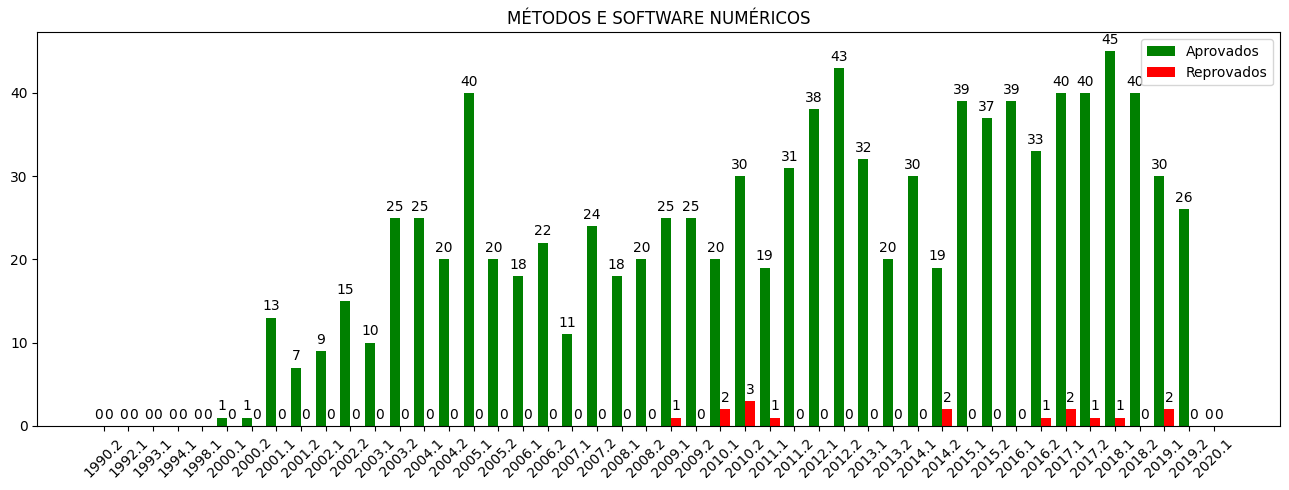

=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/


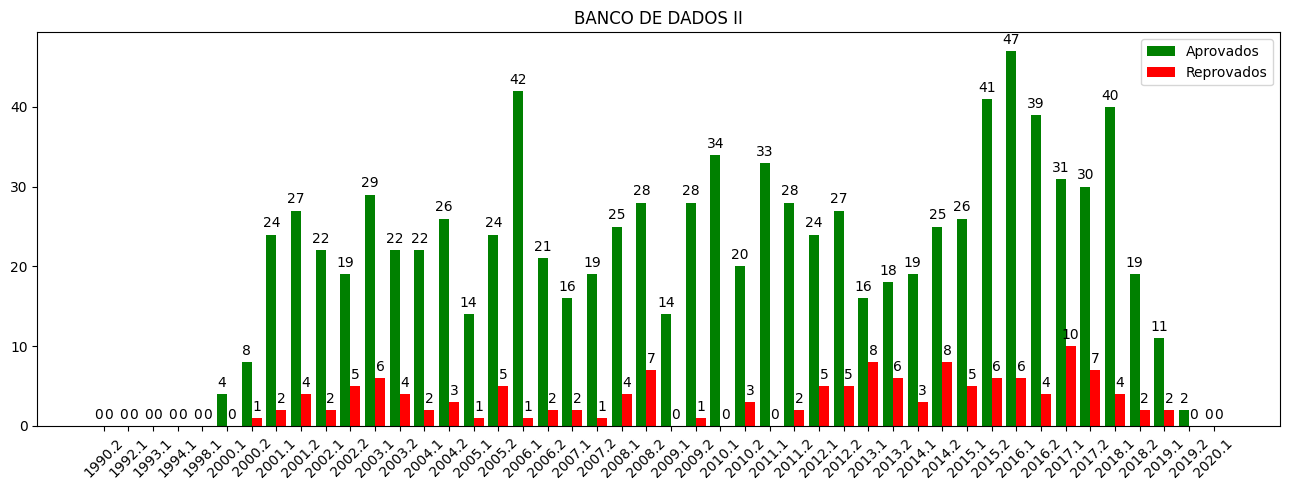

=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/


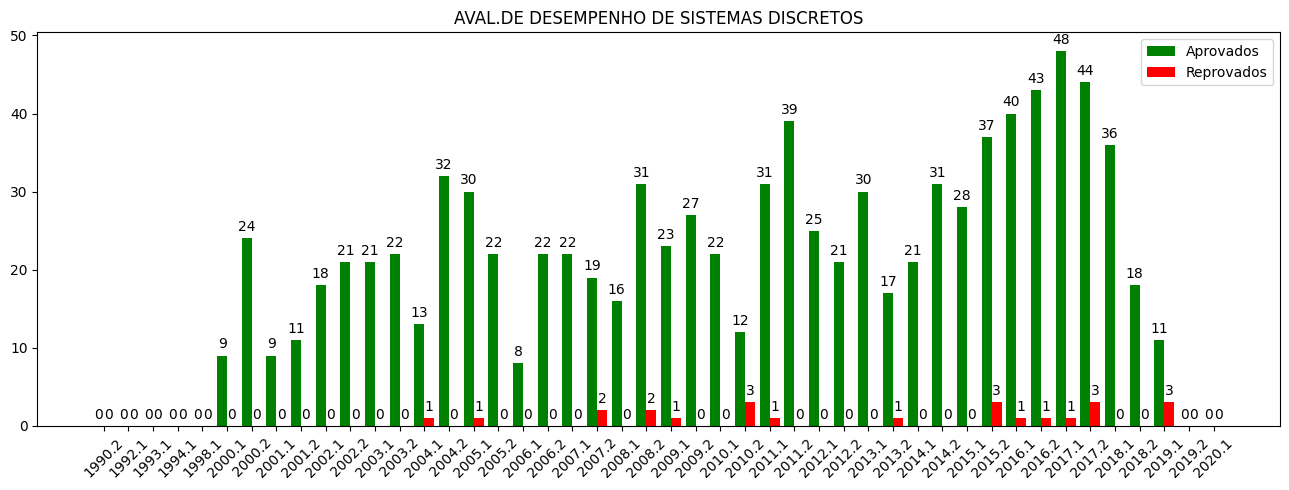

=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/


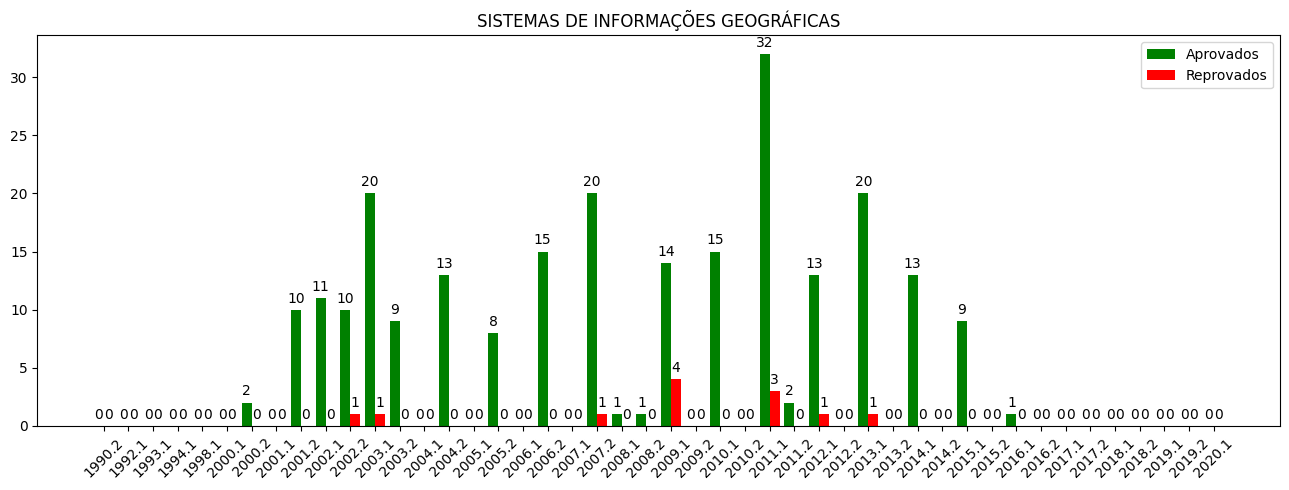

=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/


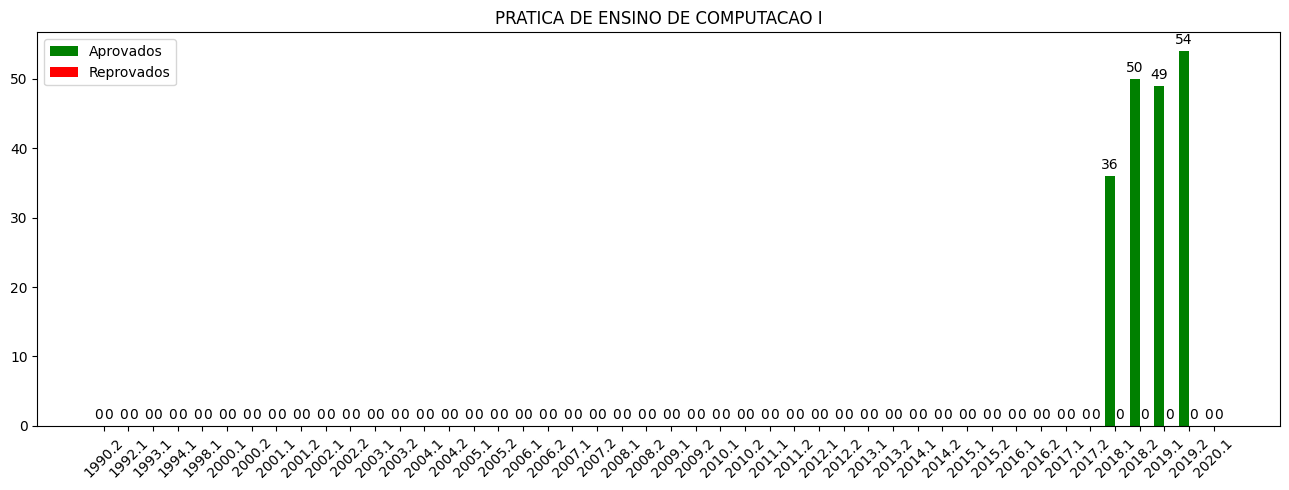

In [ ]:
grafico_optativa()

Ao visualizar os gráficos, nota-se uma distribuição consideravelmente boa entre os períodos, porém nenhuma delas apresentam registros antes do período 2000.1, talvez por baixo interresse ou talvez por a cadeira não existir de fato anteriormente. A exceção é a disciplina 'PRATICA DE ENSINO A COMPUTACAO I' que aprensenta registros apenas mais recentes.

Ainda assim, também não temos registros de aprovações ou reprovações para o período de 2020.1, mas no caso desse se deve ao fato de todos os registros estarem com o valor de 'Em Curso' na coluna 'situacao'.

In [ ]:
reprovados.head()

,,0
nome_disciplina,situacao,
BANCO DE DADOS II,Reprovado,139
AVAL.DE DESEMPENHO DE SISTEMAS DISCRETOS,Reprovado,24
MÉTODOS E SOFTWARE NUMÉRICOS,Reprovado,16
SISTEMAS DE INFORMAÇÕES GEOGRÁFICAS,Reprovado,12
INTERCONEXAO DE REDES DE COMPUTADORES,Reprovado,8


[ 0 ] ADM.DE SIST.GERENC.DE BANCO DE DADOS
[ 1 ] ADMINISTRACAO DE SISTEMAS
[ 2 ] ALGORITMOS AVANCADOS I
[ 3 ] ALGORITMOS AVANCADOS II
[ 4 ] ALGORITMOS AVANCADOS III
[ 5 ] ALGORITMOS AVANCADOS IV
[ 6 ] ARQUITETURA DE SOFTWARE
[ 7 ] AVAL.DE DESEMPENHO DE SISTEMAS DISCRETOS
[ 8 ] BANCO DE DADOS II
[ 9 ] COMPUTAÇÃO E MÚSICA
[ 10 ] COMPUTAÇÃO GRÁFICA
[ 11 ] DESENV. DE APLICACOES CORP. AVANCADAS
[ 12 ] ECONOMIA DE TECNOLOGIA DA INFORMACAO
[ 13 ] EMPREENDEDORISMO EM SOFTWARE
[ 14 ] GERENCIA DE REDES
[ 15 ] INTERCONEXAO DE REDES DE COMPUTADORES
[ 16 ] INTERFACE HOMEM-MÁQUINA
[ 17 ] MÉTODOS E SOFTWARE NUMÉRICOS
[ 18 ] OTIMIZACAO
[ 19 ] PRATICA DE ENSINO DE COMPUTACAO I
[ 20 ] PRATICA DE ENSINO DE COMPUTACAO II
[ 21 ] PRINCIPIOS DE DESENVOLVIMENTO WEB
[ 22 ] PROGRAMACAO EM BANCOS DE DADOS
[ 23 ] PROJETO DE REDES DE COMPUTADORES
[ 24 ] PROVIS. E OPER. DE INFRAESTRUTURAS
[ 25 ] RECONHEC. DE PADROES E REDES NEURAIS
[ 26 ] RECUP. DE INFORMACAO E BUSCA NA WEB
[ 27 ] SEGURANCA DE SISTEMAS
[ 28 ] SISTE

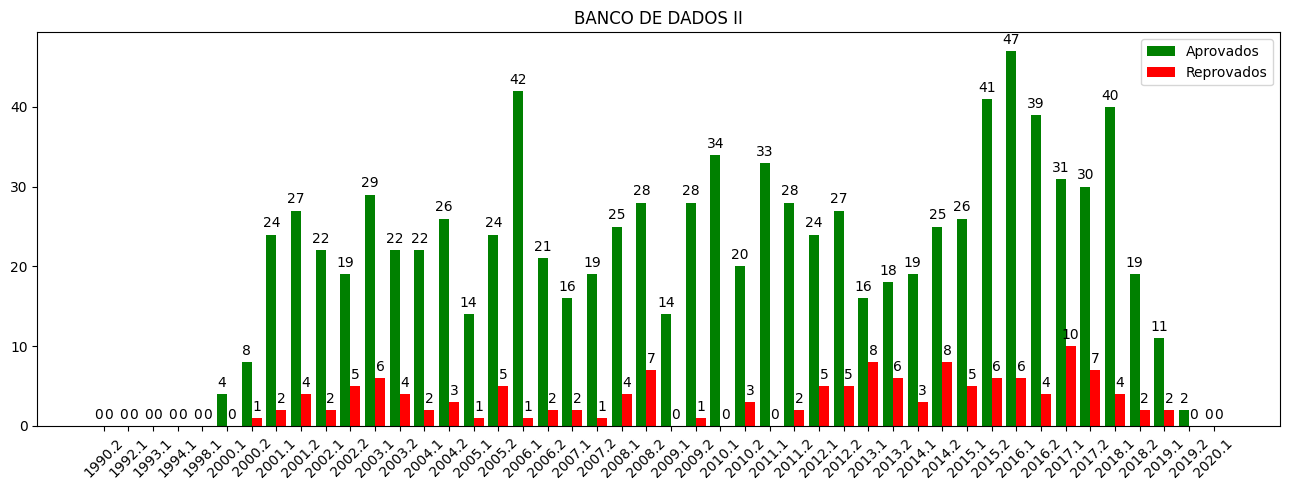

=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/


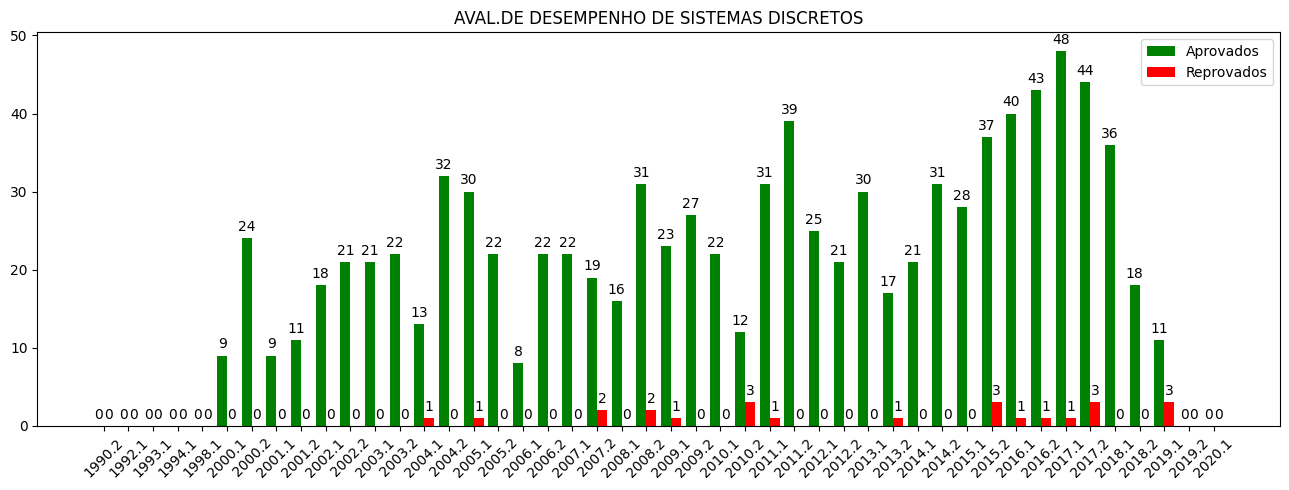

=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/


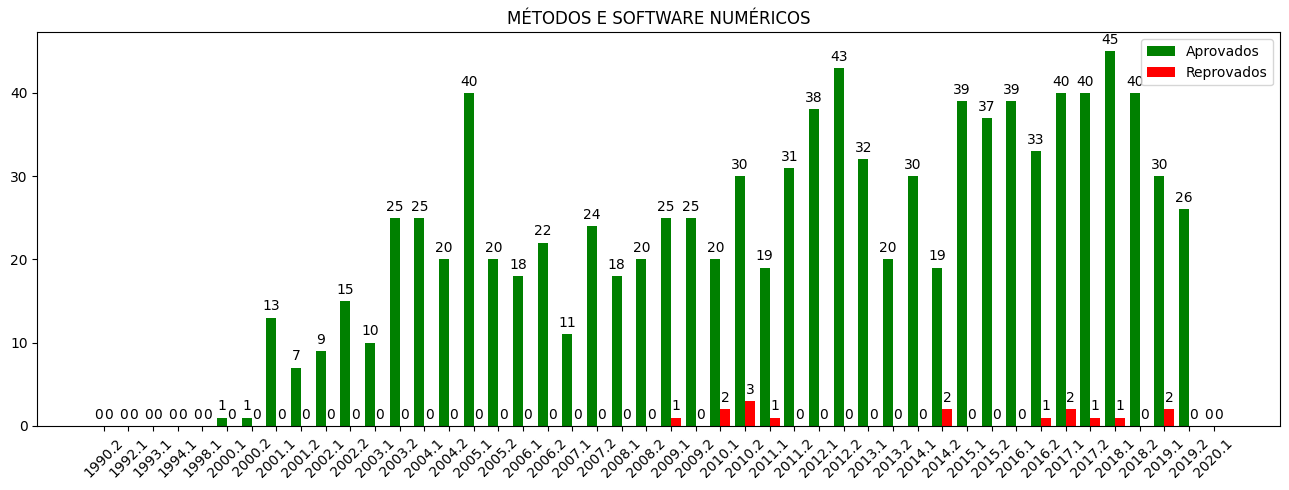

=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/


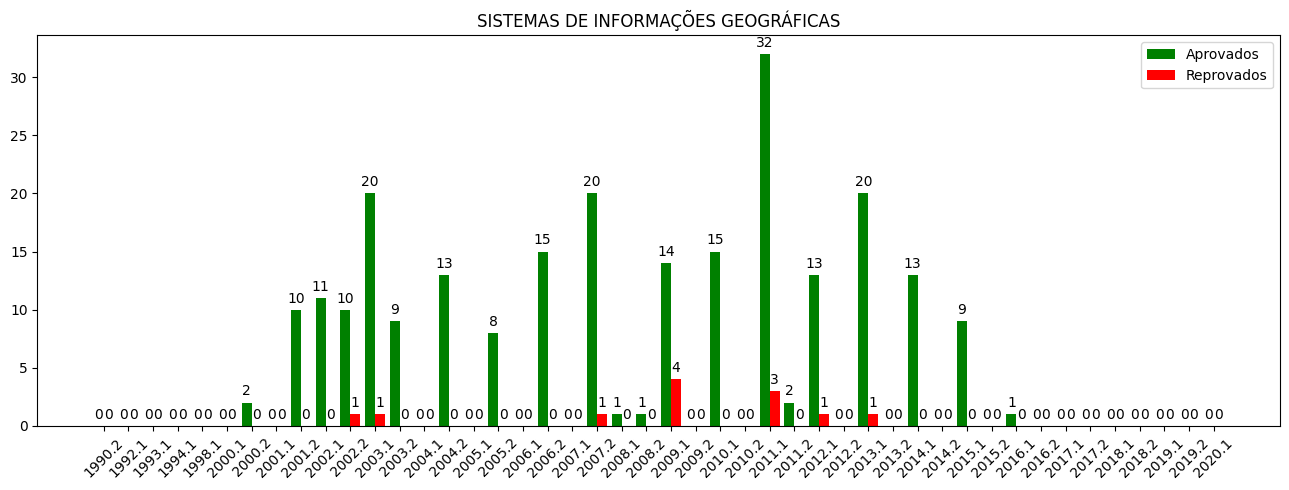

=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/


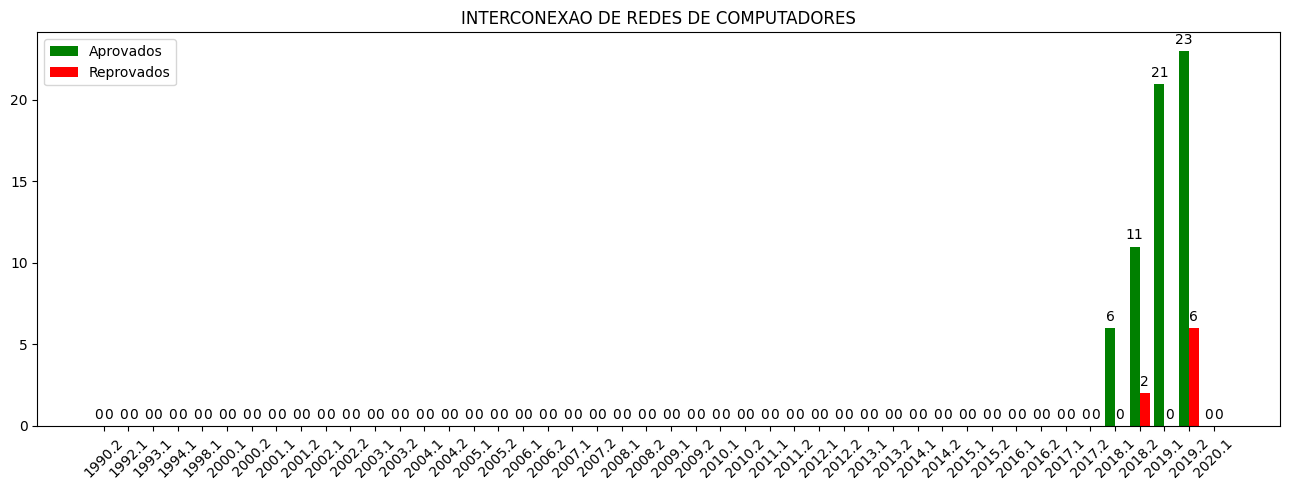

In [ ]:
grafico_optativa()

Em primeira análise, é notório que as disciplinas com mais reprovações também são as com mais aprovações no geral, isso indica um alto interresse nestas.

Assim sendo, o padrão de aprovações e reprovações se repetem nesse ponto, incluindo a falta de registros anteriores ao período 2000.1 e durante o período de 2020.1.

Da mesma forma que antes a última cadeira, 'INTERCONEXAO DE REDES DE COMPUTADORES', apresenta apenas registros mais recentes, a partir de 2018.1.

Dessa forma, percebesse que as disciplinas com maiores indices de aprovações/reprovações são por consequência as mais procuradas, talvez por demanda de mercado, fama ou pela pura curiosodade dos discentes.